Forward in time for the 1-d heat equation, temp distribution on 1-d road

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
L = 1.0
nx = 51
dx = L / (nx - 1)
alpha = 1.22e-3

x = numpy.linspace(0.0, L, num=nx)


#zeros all along road except at the left hand side where it is 100C
T0 = numpy.zeros(nx)
T0[0] = 100.0

In [7]:
def ftcs(T0, nt, dt, dx, alpha):
    #alpha is property of material
    T = T0.copy() #make copy so don't change intital condition
    sigma = alpha * dt / dx**2
    
    for n in range(nt):
        #update the values of temp at each time step, only don't update first and last points
        T[1:-1] = T[1:-1] + sigma * (T[:-2] - 2*T[1:-1] + T[2:])
        #don't need these because you never change them
        #T[0] = 100.0
        #T[-1] = 0.0
    return T

In [19]:
nt = 1000
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs(T0, nt, dt, dx, alpha)
#print(T)

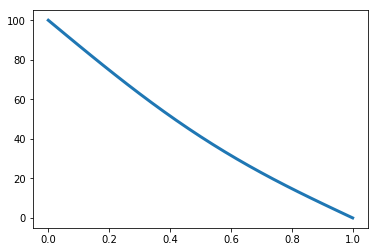

In [20]:
pyplot.plot(x, T, lw=3)

In [15]:
def ftcs_mixed_bcs(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = T[1:-1] +sigma * (T[:-2] - 2 * T[1:-1] + T[2:])
        #Neumann condition with zero gradient value
        T[-1] = T[-2]
    return T

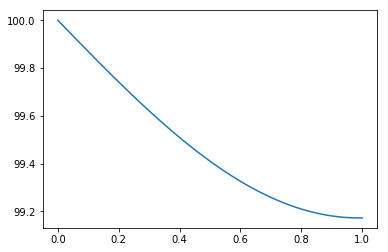

In [18]:
nt = 10000
sigma = 0.5
dt = sigma * dx**2 / alpha

T = ftcs_mixed_bcs(T0, nt, dt, dx, alpha)

pyplot.plot(x, T)